In [1]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

path = f"{getcwd()}/happy-or-sad.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall('tmp/h-or-s')
zip_ref.close()

Populating the interactive namespace from numpy and matplotlib
['happy2-06.png', 'happy1-04.png', 'happy1-18.png']


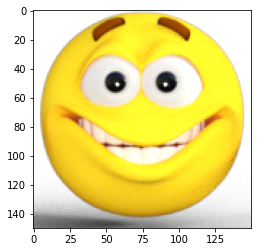

In [17]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import listdir

happy_path = "./tmp/h-or-s/happy"
print(os.listdir(happy_path)[:3])

img = mpimg.imread(happy_path + '/happy2-06.png')
imgplot = plt.imshow(img)
plt.show()


In [24]:
def train_happy_sad_model():
  DESIRED_ACCURACY = 0.999

  class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      epoch_acc = logs.get('acc')
      if (epoch_acc >= DESIRED_ACCURACY):
        print (f"Reached an accuracy of {epoch_acc} - satisfied")
        self.model.stop_training = True

  callbacks = [myCallback()]

  model = tf.keras.Sequential([
                               # Conv and Maxpooling
                               tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150,3)),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               # Flatten the 2D images
                               tf.keras.layers.Flatten(),
                               # Dense layers
                               tf.keras.layers.Dense(512, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid"),
  ])

  # TODO: Change optimizer to RMSprop if it doesn't work with adam
  model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['acc'])
  model.summary()

  # Create the ImageGenerators
  from tensorflow.keras.preprocessing.image import ImageDataGenerator

  # Use rescale when initiating the ImageGenerator to rescale every flowing image
  train_datagen = ImageDataGenerator(rescale=1/255)

  # Use flow_from_directory to create the ACTUAL generators
  train_generator = train_datagen.flow_from_directory(
      "./tmp/h-or-s",
      target_size=(150, 150),
      batch_size=10,
      class_mode='binary'
  )

  # Use the generator to fit the model

  # model fitting
  history = model.fit(
      train_generator,
      epochs=15,
      steps_per_epoch=5,
      verbose=2,
      callbacks=callbacks
  )
  # model fitting
  
  return history.history['acc'][-1]

In [23]:
train_happy_sad_model()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 17, 17, 64)      

1.0